- Passos Engenharia de variáveis

-Variáveis para serem criadas:

Blocos de latitude e longitude
Charge min, max e médio
Cidade grande = True
Nivel de digitalização


In [6]:
!pip install -q plotly

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Acesso ao MapBox para a visualização de mapas com o plotly

In [8]:
#Mapas
import plotly.graph_objects as go
import plotly.express as px
mapbox_access_token = 'pk.eyJ1IjoiZWRpc29ubXNqIiwiYSI6ImNrcGhwaHhsaDBqcjUyb2xpaHB0czVvY3oifQ.xwV3-fok4T9Z6UI9YqUJDQ'
px.set_mapbox_access_token(mapbox_access_token)

# 1 - Carregamento das bases

In [9]:
df_charges = pd.read_csv ('/content/drive/MyDrive/Vai Academy/Case Telecom/Datasets/charge_records.csv', sep = ';', decimal = ',')
df_charges

,ActiveMonth,customerID,Charges
0,M-0,0002-ORFBO,65.7450
1,M-0,8399-YNDCH,59.8010
2,M-0,2197-OMWGI,53.5225
3,M-0,8398-TBIYD,85.5675
4,M-0,2200-DSAAL,80.6500
...,...,...,...
227985,M-9,9378-FXTIZ,67.9765
227986,M-9,4476-OSWTN,110.3715
227987,M-9,7446-KQISO,107.8450
227988,M-9,8380-MQINP,19.9255


In [10]:
df_customer = pd.read_csv('/content/drive/MyDrive/Vai Academy/Case Telecom/Datasets/customers.csv', sep = ';', decimal = ',', index_col = 'customerID')
df_customer

,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason
customerID,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,United States,California,La Mesa,91941,"32.759327, -116.99726",0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,NaN
9992-RRAMN,Male,United States,California,Riverbank,95367,"37.734971, -120.954271",0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction
9992-UJOEL,Male,United States,California,Elk,95432,"39.108252, -123.645121",0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,NaN


#2 - Análise Exploratória

##2.1 - Análise Gráfica


Como a base contem informações geográficas é interessante fazer visualizações com mapa

In [11]:
#Formatando informações de longitude e latitude
df_customer[['Lat', 'Long']] = df_customer['LatLong'].str.split(',', expand = True)
df_customer['Lat'] = df_customer['Lat'].astype(float)
df_customer['Long'] = df_customer['Long'].astype(float)

Construindo um scatter map

In [12]:
fig = px.scatter_mapbox(df_customer, lat='Lat', lon = 'Long', color = 'Churn', zoom = 5)
fig.show()

Construindo gráfico de densidade

In [13]:
fig = px.density_mapbox(df_customer, lat = 'Lat', lon = 'Long', zoom = 5)
fig.show()

##2.2 Exploração

###2.2.1 Base customer

-Sem dados duplicados


In [14]:
df_customer

,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long
customerID,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,United States,California,La Mesa,91941,"32.759327, -116.99726",0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,NaN,32.759327,-116.997260
9992-RRAMN,Male,United States,California,Riverbank,95367,"37.734971, -120.954271",0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,37.734971,-120.954271
9992-UJOEL,Male,United States,California,Elk,95432,"39.108252, -123.645121",0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,NaN,39.108252,-123.645121


In [15]:
#Sem dados duplicados 
df_customer.reset_index()[['customerID']].duplicated().sum()

0

In [16]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Country           7043 non-null   object 
 2   State             7043 non-null   object 
 3   City              7043 non-null   object 
 4   ZipCode           7043 non-null   int64  
 5   LatLong           7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

In [17]:
df_customer['City'].nunique()

1129

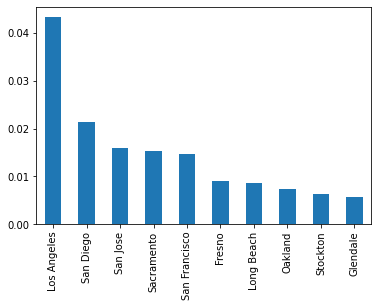

In [18]:
df_customer['City'].value_counts(normalize = True).sort_values(ascending = False).head(10).plot(kind = 'bar')

In [19]:
df_customer['Country'].nunique()

1

In [20]:
df_customer['State'].nunique()

1

###Insights 

- Existe um grande numero de cidades que podem ser classificadas em cidade grande e cidade pequena. Cidade grande seriam as 5 maiores cidades do estado

- As colunas 'Country' e 'State' pode ser eliminadas por não agregam nenhum informação nova


###2.2.2 Base charges

In [21]:
#df_charges[df_charges['customerID'] == '0011-IGKFF']

In [22]:
df_charges.customerID.nunique()

7032

### Insights

- Tornar a coluna 'ActiveMonth' em inteiro
- Criar coluna somatória, minimo e máximo da coluna 'Charges' agrupando por código de cliente

##2.3 Agregação

###2.3.1 Criação de uma base mestre

Transformação da coluna de meses ativos

In [23]:
df_charges['ActiveMonth'] = df_charges['ActiveMonth'].str.split('-').str[1]


In [24]:
df_charges['ActiveMonth'] = df_charges['ActiveMonth'].astype(int)
df_charges[df_charges['customerID'] == '0011-IGKFF']

,ActiveMonth,customerID,Charges
6847,0,0011-IGKFF,96.5540
8756,1,0011-IGKFF,97.6385
14550,10,0011-IGKFF,95.4695
23105,11,0011-IGKFF,92.5775
24511,12,0011-IGKFF,97.2770
65032,2,0011-IGKFF,94.0235
106344,3,0011-IGKFF,95.8310
146841,4,0011-IGKFF,97.6385
175186,5,0011-IGKFF,90.0470
197294,6,0011-IGKFF,94.7465


Agrupando informações por cliente

In [25]:
df_charges_by_customer = df_charges.groupby(['customerID']).agg({'Charges':['sum', 'mean', 'max', 'min', 'std'], 'ActiveMonth': 'max'})

In [26]:
df_charges_by_customer.head()

Charges                                        ActiveMonth
                sum       mean      max      min       std         max
customerID                                                            
0002-ORFBO   593.30  65.922222  66.5860  65.6000  0.351440           8
0003-MKNFE   542.40  60.266667  61.0220  59.9000  0.331828           8
0004-TLHLJ   280.85  70.212500  73.9000  66.3775  3.170392           3
0011-IGKFF  1237.85  95.219231  97.6385  90.0470  2.175941          12
0013-EXCHZ   267.40  89.133333  92.2210  84.2140  4.306305           2

Organização do nivel das colunas

In [27]:
df_charges_by_customer.columns = ['charges_sum', 'charges_mean', 'charges_max', 'charges_min', 'charges_std', 'max_month']

In [28]:
df_charges_by_customer ['max_month'] = df_charges_by_customer['max_month'].astype(int)

Criação de colunas que auxiliem a avaliar o comportamento do clientes antes de virar churn

In [29]:
df_last_3_months = df_charges.sort_values(by='ActiveMonth', ascending = True).groupby('customerID').head(3)
df_last_3_months = df_last_3_months.drop('ActiveMonth', axis = 1).groupby('customerID').agg(['sum', 'mean', 'std'])
df_last_3_months.columns = ['last_3_months_total', 'last_3_months_mean', 'last_3_months_std']

df_last_3_months

,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,
0002-ORFBO,197.9890,65.996333,0.512516
0003-MKNFE,181.5810,60.527000,0.465522
0004-TLHLJ,211.5225,70.507500,3.815093
0011-IGKFF,288.2160,96.072000,1.855074
0013-EXCHZ,267.4000,89.133333,4.306305
...,...,...,...
9987-LUTYD,169.3425,56.447500,0.686572
9992-RRAMN,255.5250,85.175000,0.065383
9992-UJOEL,92.7500,46.375000,4.773678


Fazer o merge com df_charges_by_customer


In [30]:
df_charge_complete = pd.merge(df_charges_by_customer, df_last_3_months, how = 'inner', on = 'customerID')

df_charge_complete

,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,,,,,,,
0002-ORFBO,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516
0003-MKNFE,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522
0004-TLHLJ,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093
0011-IGKFF,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074
0013-EXCHZ,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305
...,...,...,...,...,...,...,...,...,...
9987-LUTYD,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572
9992-RRAMN,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383
9992-UJOEL,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678


In [31]:
df_complete = pd.merge(df_customer, df_charge_complete, how = 'inner', on = 'customerID')
df_complete

,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516
0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522
0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093
0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074
0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,United States,California,La Mesa,91941,"32.759327, -116.99726",0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,NaN,32.759327,-116.997260,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572
9992-RRAMN,Male,United States,California,Riverbank,95367,"37.734971, -120.954271",0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,37.734971,-120.954271,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383
9992-UJOEL,Male,United States,California,Elk,95432,"39.108252, -123.645121",0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,NaN,39.108252,-123.645121,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678


##2.4 Transformação

Drop de colunas

In [32]:
to_drop = ['ZipCode', 'Country', 'State', 'LatLong', 'ChurnReason']

df_complete = df_complete.drop(to_drop, axis = 1)

In [33]:
def null_check(df):
  nulls = df.isnull().sum()
  print (nulls[nulls>1])


In [34]:
null_check(df_complete)

charges_std          613
last_3_months_std    613
dtype: int64


Foi atribuído Nan para o desvio padrão de clientes com apenas uma observação. Os valores nulos serão substituidos por 0 

In [35]:
df_complete.loc['0021-IKXGC']
#df_customer[df_customer['customerID'] == '0021-IKXGC']

gender                           Female
City                         San Marcos
SeniorCitizen                         1
Partner                              No
Dependents                           No
PhoneService                        Yes
MultipleLines                       Yes
InternetService             Fiber optic
OnlineSecurity                       No
OnlineBackup                         No
DeviceProtection                     No
TechSupport                          No
StreamingTV                          No
StreamingMovies                      No
Contract                 Month-to-month
PaperlessBilling                    Yes
PaymentMethod          Electronic check
Churn                                No
Lat                              33.119
Long                           -117.166
charges_sum                        72.1
charges_mean                       72.1
charges_max                        72.1
charges_min                        72.1
charges_std                         NaN


In [36]:
df_complete['charges_std'].fillna(0, inplace = True)


In [37]:
df_complete['last_3_months_std'].fillna(0, inplace = True)

In [38]:
null_check(df_complete)

Series([], dtype: int64)


In [39]:
df_complete.head()

,gender,City,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,Frazier Park,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516
0003-MKNFE,Male,Glendale,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522
0004-TLHLJ,Male,Costa Mesa,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093
0011-IGKFF,Male,Martinez,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074
0013-EXCHZ,Female,Camarillo,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305


Transformar a coluna de cidade em variável discreta cidade grande ou não. Serão consideradas as 5 maiores cidades do estado da Califórnia. 

https://pt.wikipedia.org/wiki/Lista_de_cidades_da_Calif%C3%B3rnia

In [40]:
df_transf = df_complete



In [41]:
big_city = ['Los Angeles', 'San Diego', 'São José', 'São Francisco', 'Fresno']

a = df_transf[['City']].isin(big_city)

a = pd.get_dummies(a['City'], drop_first=True)

df_transf['big_city'] = a.iloc[:, 0]

df_transf = df_transf.drop(['City'], axis = 1)

df_transf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std,big_city
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516,0
0003-MKNFE,Male,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522,0
0004-TLHLJ,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093,0
0011-IGKFF,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074,0
0013-EXCHZ,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,32.759327,-116.997260,742.90,57.146154,63.9730,55.4095,2.153966,12,169.3425,56.447500,0.686572,0
9992-RRAMN,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,37.734971,-120.954271,1873.70,85.168182,85.4150,85.1000,0.074890,21,255.5250,85.175000,0.065383,0
9992-UJOEL,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,39.108252,-123.645121,92.75,46.375000,49.7505,42.9995,4.773678,1,92.7500,46.375000,4.773678,0


In [42]:
import regex as re

a = pd.get_dummies(df_transf, drop_first= False)

a.head()





,SeniorCitizen,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std,big_city,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0
0003-MKNFE,0,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0
0004-TLHLJ,0,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
0011-IGKFF,1,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
0013-EXCHZ,1,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [43]:
a.columns = [col.replace("_Yes", "") for col in a.columns]
a.head()

,SeniorCitizen,Lat,Long,charges_sum,charges_mean,charges_max,charges_min,charges_std,max_month,last_3_months_total,last_3_months_mean,last_3_months_std,big_city,gender_Female,gender_Male,Partner_No,Partner,Dependents_No,Dependents,PhoneService_No,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection,TechSupport_No,TechSupport_No internet service,TechSupport,StreamingTV_No,StreamingTV_No internet service,StreamingTV,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,34.827662,-118.999073,593.30,65.922222,66.5860,65.6000,0.351440,8,197.9890,65.996333,0.512516,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0
0003-MKNFE,0,34.162515,-118.203869,542.40,60.266667,61.0220,59.9000,0.331828,8,181.5810,60.527000,0.465522,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0
0004-TLHLJ,0,33.645672,-117.922613,280.85,70.212500,73.9000,66.3775,3.170392,3,211.5225,70.507500,3.815093,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
0011-IGKFF,1,38.014457,-122.115432,1237.85,95.219231,97.6385,90.0470,2.175941,12,288.2160,96.072000,1.855074,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
0013-EXCHZ,1,34.227846,-119.079903,267.40,89.133333,92.2210,84.2140,4.306305,2,267.4000,89.133333,4.306305,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [44]:
#Algumas colunas apresentam informações que podem ser condensadas.
#Por exemplo: As informações de MultipleLines_No e MultipleLines_No phone service são pessoas sem multiplas linhas que podem ser explicadas só pela coluna Multiplelines

to_drop = ['gender_Male', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No', 'Churn_No', 
           'MultipleLines_No', 'MultipleLines_No phone service','OnlineSecurity_No', 'OnlineSecurity_No internet service',
           'OnlineBackup_No','OnlineBackup_No internet service','DeviceProtection_No', 'DeviceProtection_No internet service',
           'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingMovies_No',
           'StreamingMovies_No internet service', 'PaperlessBilling_No', 'Lat', 'Long' ]

a = a.drop(to_drop, axis = 1)

In [45]:
#Outras colunas podem ser agrupadas
#Por exemplo: InternetService_DSL	InternetService_Fiber optic pode ser substituido por internet Yes

a['InternetService'] = a['InternetService_DSL'] + a['InternetService_Fiber optic']
a = a.drop(['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No'], axis = 1)


In [46]:
#Métodos de pagamento podem ser agrupados em automatico ou não
a['PaymentMethod_automatic'] = a['PaymentMethod_Bank transfer (automatic)'] + a['PaymentMethod_Credit card (automatic)']
a = a.drop(['PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)' ], axis = 1)

In [47]:
df_clean = a

###2.4.3 Redimensionamento de variáveis

A diferença de magnitude entre varáveis impacta negativamento alguns modelos que têm como premissa dados centralizados em zero. Portanto, para essa etapa, serão seguidos os seguintes passos:

1- Verificação de outliers

2- Teste de shapiro para avaliar quais variáveis possuem distribuição normal
*texto em itálico*
3- 



In [48]:
df_cont = df_clean.iloc[:, 1:10]

charges_sum               AxesSubplot(0.125,0.125;0.0731132x0.755)
charges_mean           AxesSubplot(0.212736,0.125;0.0731132x0.755)
charges_max            AxesSubplot(0.300472,0.125;0.0731132x0.755)
charges_min            AxesSubplot(0.388208,0.125;0.0731132x0.755)
charges_std            AxesSubplot(0.475943,0.125;0.0731132x0.755)
max_month              AxesSubplot(0.563679,0.125;0.0731132x0.755)
last_3_months_total    AxesSubplot(0.651415,0.125;0.0731132x0.755)
last_3_months_mean     AxesSubplot(0.739151,0.125;0.0731132x0.755)
last_3_months_std      AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

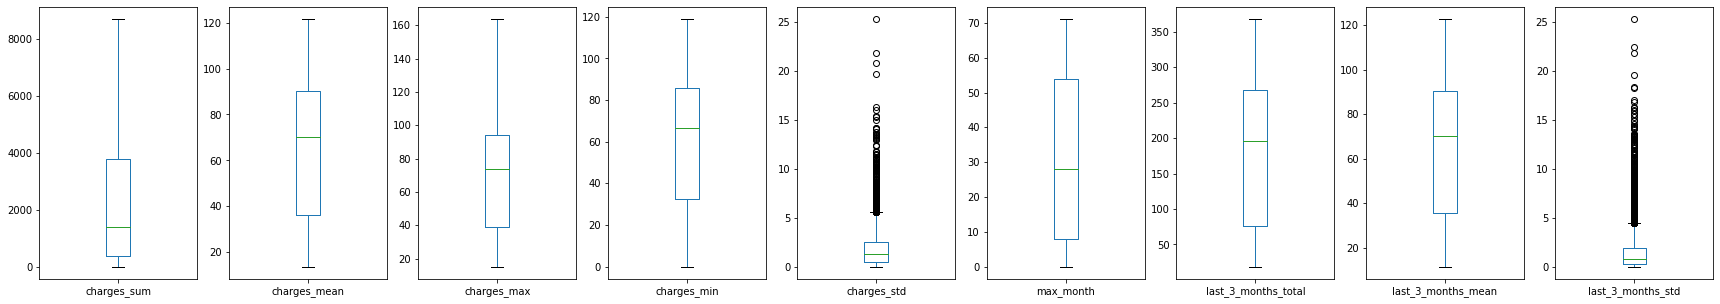

In [49]:
df_cont.plot(kind = 'box', figsize = (30, 5), subplots = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e70ebf410>,
      dtype=object)

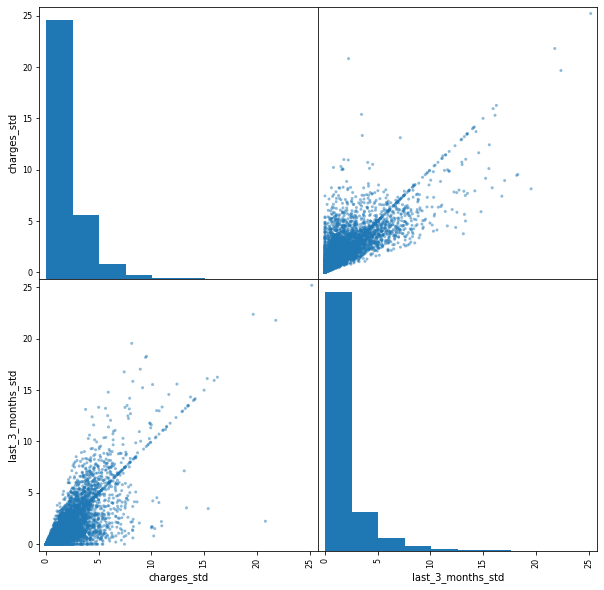

In [50]:
#Avaliação das colunas charges_std e last_3_months_std
df_std = df_cont[['charges_std','last_3_months_std']]
pd.plotting.scatter_matrix(df_std, figsize=(10,10))


In [51]:
df_cont = df_cont.drop(df_std, axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e75382b50>,
      dtype=object)

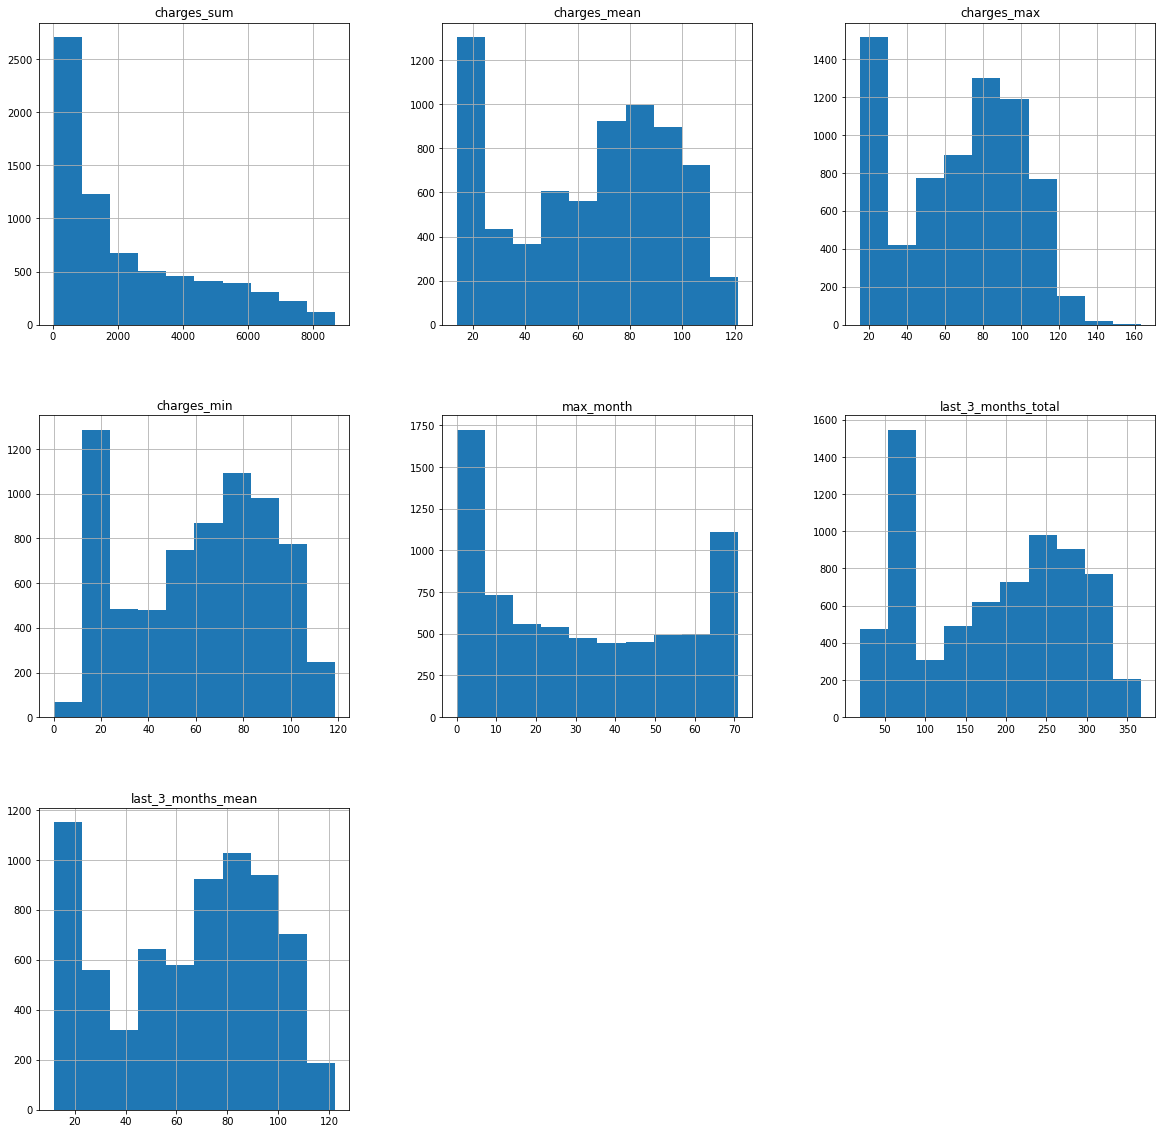

In [52]:
df_cont.hist(figsize=(20,20))

In [53]:
from scipy.stats import shapiro

for column in df_cont.columns:
    print("O teste de Shapiro para {} é: {}".format(column, shapiro(df_cont[column].sample(5000))))

O teste de Shapiro para charges_sum é: (0.8587921857833862, 0.0)
O teste de Shapiro para charges_mean é: (0.928141176700592, 8.267660939516421e-44)
O teste de Shapiro para charges_max é: (0.9397907853126526, 4.678795442534132e-41)
O teste de Shapiro para charges_min é: (0.9397221207618713, 4.4945246944754183e-41)
O teste de Shapiro para max_month é: (0.9045582413673401, 0.0)
O teste de Shapiro para last_3_months_total é: (0.9299448728561401, 2.0739217272007293e-43)
O teste de Shapiro para last_3_months_mean é: (0.9255906343460083, 2.2420775429197073e-44)


### Insights

- As colunas que contêm dados de desvio padrão prossuem uma grande quantidade de outliers. Isso provavelmente se dá pela variação de perfil de cliente. Existem os clientes antigos e que foram adiquirindo novos serviços, clientes novos que pagam a mesma coisa todo mes, clientes de 1 mês. Portanto, as colunas de desvio padrão serão removidas

- Nenhuma das colunas aparenta ter dados com distribuição normal e essa hipótese foi confirmada com o teste de shapiro

-** Portanto os dados serão normalizados com ** Decidir como será feita a normalização dos dados

customerID
0002-ORFBO    16.045504
0003-MKNFE    15.594319
0004-TLHLJ    12.580953
0011-IGKFF    20.160739
0013-EXCHZ    12.375868
                ...    
9987-LUTYD    17.222964
9992-RRAMN    22.843629
9992-UJOEL     8.521758
9993-LHIEB    29.777552
9995-HOTOH    27.927026
Name: charges_norm, Length: 7032, dtype: float64

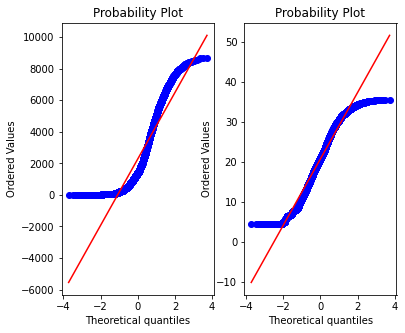

In [68]:
from scipy.stats import boxcox, probplot, norm, lognorm

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

box_values = boxcox(df_cont['charges_sum'],alpha=0.05)
df_cont['charges_norm'] = box_values[0]
probplot(df_cont['charges_sum'], dist=norm, plot=ax1)
probplot(box_values[0], dist=norm, plot=ax2)


In [70]:
df_cont

,charges_sum,charges_mean,charges_max,charges_min,max_month,last_3_months_total,last_3_months_mean,charges_norm
customerID,,,,,,,,
0002-ORFBO,593.30,65.922222,66.5860,65.6000,8,197.9890,65.996333,16.045504
0003-MKNFE,542.40,60.266667,61.0220,59.9000,8,181.5810,60.527000,15.594319
0004-TLHLJ,280.85,70.212500,73.9000,66.3775,3,211.5225,70.507500,12.580953
0011-IGKFF,1237.85,95.219231,97.6385,90.0470,12,288.2160,96.072000,20.160739
0013-EXCHZ,267.40,89.133333,92.2210,84.2140,2,267.4000,89.133333,12.375868
...,...,...,...,...,...,...,...,...
9987-LUTYD,742.90,57.146154,63.9730,55.4095,12,169.3425,56.447500,17.222964
9992-RRAMN,1873.70,85.168182,85.4150,85.1000,21,255.5250,85.175000,22.843629
9992-UJOEL,92.75,46.375000,49.7505,42.9995,1,92.7500,46.375000,8.521758


In [71]:
for column in df_cont.columns:
    print("O teste de Shapiro para {} é: {}".format(column, shapiro(df_cont[column].sample(5000))))

O teste de Shapiro para charges_sum é: (0.8597293496131897, 0.0)
O teste de Shapiro para charges_mean é: (0.9279440641403198, 7.42688186092153e-44)
O teste de Shapiro para charges_max é: (0.9394852519035339, 3.913546351166349e-41)
O teste de Shapiro para charges_min é: (0.9385777115821838, 2.312142466135948e-41)
O teste de Shapiro para max_month é: (0.903486430644989, 0.0)
O teste de Shapiro para last_3_months_total é: (0.9266682863235474, 3.923635700109488e-44)
O teste de Shapiro para last_3_months_mean é: (0.9265249371528625, 3.6433760072445244e-44)
O teste de Shapiro para charges_norm é: (0.9656393527984619, 6.22375622681636e-33)


Dropar colunas inúteis ou com informações repetidas

In [ ]:
df_customer_clean = df_customer
df_customer_clean = df_customer_clean.iloc[:, 6:-3]

Transformando variáveis categóricas em 0 e 1

In [ ]:
df_customer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SeniorCitizen     7043 non-null   int64 
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: int64(1), object(15)
memory usage: 935.4+ KB


In [ ]:
#pd.get_dummies(df_customer_clean.Partner, drop_first= True)
#pd.get_dummies(df_customer_clean.MultipleLines, drop_first= True)
df_fat = pd.get_dummies(df_customer_clean.iloc[:, :], drop_first= True)

In [ ]:
df_fat

,SeniorCitizen,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
0003-MKNFE,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
0004-TLHLJ,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
0011-IGKFF,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
0013-EXCHZ,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9992-RRAMN,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
9992-UJOEL,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


Transformando o data set de charges para que ele possa ser concatenado ao customer

In [ ]:
df_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227990 entries, 0 to 227989
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ActiveMonth  227990 non-null  object 
 1   customerID   227990 non-null  object 
 2   Charges      227990 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.2+ MB


In [ ]:
df_charges.describe()

,Charges
count,227990.000000
mean,70.424881
std,31.334567
min,0.004000
25%,45.142000
50%,78.150500
75%,96.832000
max,163.486500


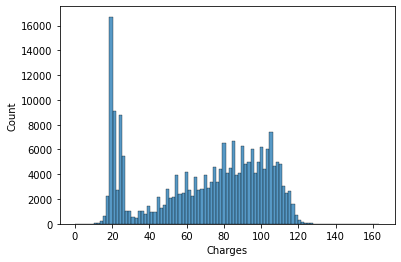

In [ ]:
sns.histplot(df_charges.Charges)

Verificando charges

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



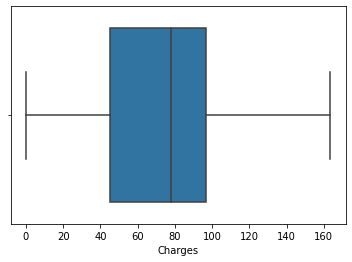

In [ ]:
sns.boxplot(df_charges.Charges)

Verificando ouliers


1.   Não há outiliers




In [ ]:
def outliers (df):

  q_25 = df.quantile(0.25)
  q_75 = df.quantile(0.75)

  lim_sup = q_75 + 1.5 * (q_75 - q_25)
  lim_inf = q_25 - 1.5 * (q_75 - q_25)

  print(f'Limite superior {lim_sup}')
  print(f' limite inferior {lim_inf}')

  return lim_sup, lim_inf

outliers(df_charges.Charges)

Limite superior 174.36699999999996
 limite inferior -32.392999999999965


(174.36699999999996, -32.392999999999965)

Transformando a coluna de meses ativos



In [ ]:
df_c_charges = df_charges.copy()

#df_c_charges['Mes'] = 
df_c_charges ['Meses_ativos'] = df_charges.ActiveMonth.str.split('-').str[1]

df_c_charges = df_c_charges.drop(labels = 'ActiveMonth', axis = 1)

df_c_charges['Meses_ativos'] = df_c_charges['Meses_ativos'].astype(int)


Análisando coluna de meses





In [ ]:
fig = px.histogram(df_c_charges, x = 'Meses_ativos')
fig.show()

Conceito Life Time Value (LTV)

o cálculo LTV mede o quanto você fatura com um cliente durante o relacionamento dele com seu negócio (daí vem o termo “tempo de vida”)



 $$
LTV = \frac{\sum Charges.cliente}{Cliente}
$$

Análise LTV

In [ ]:
ltv = df_c_charges
ltv = ltv.groupby('customerID').sum().reset_index()
ltv = ltv.drop('Meses_ativos', axis = 1)

mes_concat = df_c_charges.sort_values(['Meses_ativos'], ascending= False)
mes_concat = mes_concat.drop_duplicates(['customerID'], keep = 'first')
mes_concat = mes_concat.drop('Charges', axis = 1)


ltv_final = pd.merge(ltv, mes_concat, on = 'customerID', how = 'inner')
ltv_final



,customerID,Charges,Meses_ativos
0,0002-ORFBO,593.30,8
1,0003-MKNFE,542.40,8
2,0004-TLHLJ,280.85,3
3,0011-IGKFF,1237.85,12
4,0013-EXCHZ,267.40,2
...,...,...,...
7027,9987-LUTYD,742.90,12
7028,9992-RRAMN,1873.70,21
7029,9992-UJOEL,92.75,1
7030,9993-LHIEB,4627.65,66


Visualização LTV / meses ativos



*   O gráfico de somatória de charges se assemelha à uma distribuição exponencial
*   Tem um grupo de pessoas com um grande número de meses ativos e que pagou muito pouco até hoje

*   Pode ser interessante separar por faixas e verificar a presença de outliers











In [ ]:
fig = px.histogram(ltv_final, x = 'Meses_ativos')
fig.show()

In [ ]:
fig = px.histogram(ltv_final, x='Charges')
fig.show()

In [ ]:

fig = px.scatter (ltv_final, x = 'Meses_ativos', y = 'Charges')
fig.show()

Merge dos df ltv_final e customer

In [ ]:

df_completo = pd.merge(df_customer, ltv_final, on = 'customerID')
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   Country           7032 non-null   object 
 3   State             7032 non-null   object 
 4   City              7032 non-null   object 
 5   ZipCode           7032 non-null   int64  
 6   LatLong           7032 non-null   object 
 7   SeniorCitizen     7032 non-null   int64  
 8   Partner           7032 non-null   object 
 9   Dependents        7032 non-null   object 
 10  PhoneService      7032 non-null   object 
 11  MultipleLines     7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


In [ ]:
df_completo

,customerID,gender,Country,State,City,ZipCode,LatLong,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,ChurnReason,Lat,Long,Charges,Meses_ativos
0,0002-ORFBO,Female,United States,California,Frazier Park,93225,"34.827662, -118.999073",0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,NaN,34.827662,-118.999073,593.30,8
1,0003-MKNFE,Male,United States,California,Glendale,91206,"34.162515, -118.203869",0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,NaN,34.162515,-118.203869,542.40,8
2,0004-TLHLJ,Male,United States,California,Costa Mesa,92627,"33.645672, -117.922613",0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,Price too high,33.645672,-117.922613,280.85,3
3,0011-IGKFF,Male,United States,California,Martinez,94553,"38.014457, -122.115432",1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,38.014457,-122.115432,1237.85,12
4,0013-EXCHZ,Female,United States,California,Camarillo,93010,"34.227846, -119.079903",1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,Network reliability,34.227846,-119.079903,267.40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,Female,United States,California,La Mesa,91941,"32.759327, -116.99726",0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,NaN,32.759327,-116.997260,742.90,12
7028,9992-RRAMN,Male,United States,California,Riverbank,95367,"37.734971, -120.954271",0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,Product dissatisfaction,37.734971,-120.954271,1873.70,21
7029,9992-UJOEL,Male,United States,California,Elk,95432,"39.108252, -123.645121",0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,NaN,39.108252,-123.645121,92.75,1
7030,9993-LHIEB,Male,United States,California,Solana Beach,92075,"33.001813, -117.263628",0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,No,NaN,33.001813,-117.263628,4627.65,66


Criando uma máquina para prever o Churn de um cliente (y resposta) a partir da variáveis fatoradas

Eliminando colunas desnecessárias

In [ ]:
#Transformação dos dados para aplicar modelo
df_ml = df_completo
drop_columns =['customerID', 'Country', 'State', 'City', 'ZipCode', 'LatLong', 'ChurnReason', 'Lat', 'Long']
df_ml = df_ml.drop(drop_columns, axis =1)

In [ ]:
df_ml

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Charges,Meses_ativos
0,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,593.30,8
1,Male,0,No,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,No,542.40,8
2,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,280.85,3
3,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,1237.85,12
4,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,Yes,267.40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Female,0,No,No,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,No,742.90,12
7028,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,Yes,1873.70,21
7029,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,No,92.75,1
7030,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,No,4627.65,66


Verificando Outliers em Meses_ativos e Charges



*   Não há outliers



In [ ]:
outliers(df_ml.Charges)

df_ml[df_ml['Charges'] > 8884.66]



Limite superior 8884.66875
 limite inferior -4688.481250000001


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Charges,Meses_ativos


In [ ]:
outliers(df_ml.Meses_ativos)

df_ml[df_ml['Meses_ativos'] > 123]

Limite superior 123.0
 limite inferior -61.0


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Charges,Meses_ativos


In [ ]:
df_ml_fat = pd.get_dummies(df_ml.iloc[:, :], drop_first= True)
df_ml_fat

,SeniorCitizen,Charges,Meses_ativos,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,593.30,8,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0,542.40,8,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,280.85,3,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
3,1,1237.85,12,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
4,1,267.40,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,742.90,12,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7028,0,1873.70,21,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
7029,0,92.75,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7030,0,4627.65,66,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0


Teste de Shapiro



*   Charges e meses ativos não apresentam um distribuição normal
*   Item da lista



In [ ]:
from scipy.stats import shapiro

for column in df_ml_fat.columns:
    print("O teste de Shapiro para {} é: {}".format(column, shapiro(df_ml_fat[column].sample(5000))))

O teste de Shapiro para SeniorCitizen é: (0.44802427291870117, 0.0)
O teste de Shapiro para Charges é: (0.8595080971717834, 0.0)
O teste de Shapiro para Meses_ativos é: (0.9034066200256348, 0.0)
O teste de Shapiro para gender_Male é: (0.6365885138511658, 0.0)
O teste de Shapiro para Partner_Yes é: (0.6360757350921631, 0.0)
O teste de Shapiro para Dependents_Yes é: (0.5739872455596924, 0.0)
O teste de Shapiro para PhoneService_Yes é: (0.3342500329017639, 0.0)
O teste de Shapiro para MultipleLines_No phone service é: (0.3382447361946106, 0.0)
O teste de Shapiro para MultipleLines_Yes é: (0.6279282569885254, 0.0)
O teste de Shapiro para InternetService_Fiber optic é: (0.6308407783508301, 0.0)
O teste de Shapiro para InternetService_No é: (0.5104970932006836, 0.0)
O teste de Shapiro para OnlineSecurity_No internet service é: (0.5094825029373169, 0.0)
O teste de Shapiro para OnlineSecurity_Yes é: (0.5671591758728027, 0.0)
O teste de Shapiro para OnlineBackup_No internet service é: (0.506444

Normalizando os dados de charges e meses ativos

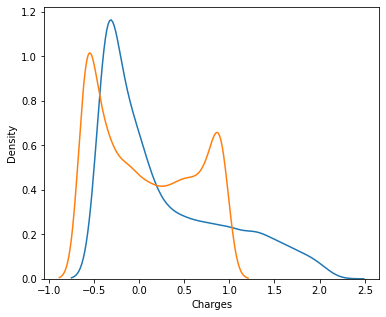

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
scaled_df = scaler.fit_transform(df_ml_fat[['Charges', 'Meses_ativos']])
scaled_df = pd.DataFrame(scaled_df, columns=['Charges', 'Meses_ativos'])
scaled_df

fig, (ax1) = plt.subplots(figsize=(6, 5))


sns.kdeplot(scaled_df['Charges'], ax=ax1)
sns.kdeplot(scaled_df['Meses_ativos'], ax=ax1)


In [ ]:
df_ml_norm = df_ml_fat
df_ml_norm['Charges'] = scaled_df['Charges']
df_ml_norm['Meses_ativos'] = scaled_df['Meses_ativos']

df_ml_norm

,SeniorCitizen,Charges,Meses_ativos,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-0.236990,-0.434783,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0,-0.251990,-0.434783,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,-0.329069,-0.543478,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
3,1,-0.047041,-0.347826,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1
4,1,-0.333032,-0.565217,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,-0.192903,-0.347826,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7028,0,0.140343,-0.152174,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
7029,0,-0.384502,-0.586957,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7030,0,0.951931,0.826087,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0


Seleção de variáveis - PCA

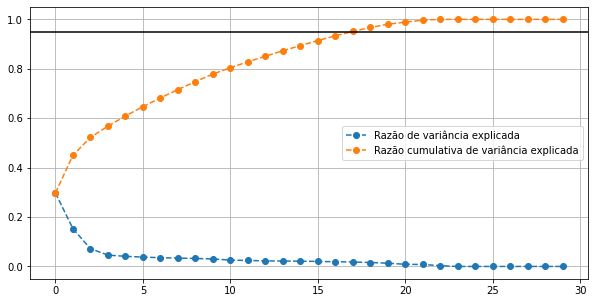

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_trafo = PCA().fit(df_ml_norm)

plt.figure(figsize=(10,5))
plt.plot(pca_trafo.explained_variance_ratio_, '--o', label='Razão de variância explicada')
plt.plot(pca_trafo.explained_variance_ratio_.cumsum(), '--o', label='Razão cumulativa de variância explicada')
plt.axhline(y=.95, linewidth=1.5, color='k')
plt.legend()
plt.grid()

In [ ]:
pca_trafo.components_[0]

array([-0.05813529, -0.35376569, -0.15040067,  0.00367505, -0.05779226,
        0.02883219,  0.01529492, -0.01529492, -0.15012284, -0.20192369,
        0.27268367,  0.27268367, -0.14158388,  0.27268367, -0.18819804,
        0.27268367, -0.19692082,  0.27268367, -0.15223567,  0.27268367,
       -0.21974512,  0.27268367, -0.22152796, -0.01305448,  0.00194593,
       -0.13447272, -0.02556348, -0.08491476,  0.13406638, -0.03894773])

In [ ]:
def get_most_important_feature_from(pc):
    return np.argmax(pc)

PC1 = pca_trafo.components_[0]
feat_1_idx = get_most_important_feature_from(PC1)
print('Índice', feat_1_idx)
print('Valor', PC1[feat_1_idx])

Índice 15
Valor 0.27268367181743347


In [ ]:
def feat_select_idx_pca(retained_pcs, n_feats):
    """ Dada uma matriz contendo os primeiros PCs usados, retorna os indices
    dos features mais importantes (com maior coeficiente medio)
    """
    # Toma a media de cada coeficiente entre os diferentes PCs
    mcoefs = np.mean(retained_pcs, axis=0)
    
    return np.argpartition(mcoefs, -n_feats)[-n_feats:]

In [ ]:


# Ajusta o transformador PCA aos dados (nao e necessario transformar os dados)
pca_trafo = PCA().fit(df_ml_norm)

# Calcula o numero de componentes principais que explicam 90% da variancia
cum_exp_var = pca_trafo.explained_variance_ratio_.cumsum()
n_pcs = np.sum(cum_exp_var < .9)
n_pcs_str = str(n_pcs)

# Calcula os indices dos 4 features mais importantes nesses PCs
idx = feat_select_idx_pca(pca_trafo.components_[:4], 16)
idx.sort()
print(idx)
# Identifica os nomes desses 4 features mais importantes
retained_features = [df_ml_norm.columns[i] for i in idx]

print('Features originais:', list(df_ml_norm.columns.values))
print('Features mantidos:', retained_features)

[ 2  4  5  7 10 11 12 13 15 17 18 19 21 23 24 28]
Features originais: ['SeniorCitizen', 'Charges', 'Meses_ativos', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_Yes']
Features mantidos: ['Meses_ativos', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecur

In [ ]:
#df_norm_clean =

df_norm_clean = df_ml_norm [retained_features]




In [ ]:
df_nomr_clean

,Meses_ativos,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Mailed check
0,-0.434783,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
1,-0.434783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.543478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.347826,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.565217,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.347826,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
7028,-0.152174,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7029,-0.586957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7030,0.826087,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1


Separando em variáveis e resposta (Churn) e transformando para array

In [ ]:
df_X = df_fat.iloc[:, :-1]
df_y = df_fat.iloc[:, -1]

X = np.array(df_X)
y = np.array(df_y)


Verificando balanço do dataset

Existem muito mais não churn (0) que churn (1). Portanto, é interessante usar como métrica F1-Score ou AUC

In [ ]:
l = list(y)

perc_0= l.count(0)/len(l)
perc_1 = l.count(1)/len(l)
verf = perc_0 + perc_1

print(perc_0, perc_1, verf)

0.7346301292063041 0.2653698707936959 1.0


Split de Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

seed = 10

X_training, X_test, y_training, y_test = train_test_split(X, y, random_state = seed, test_size = 0.33, stratify = y)


Split de Treino e Validação

In [ ]:
# Mesmo procedimento, mas para o conjunto de trieno resultante

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, random_state = seed, test_size = 0.33, stratify = y_training)

print("Train set X", X_train.shape)
print("Train set y", y_train.shape)
print("Validation set X", X_val.shape)
print("Validation set y", y_val.shape)

Train set X (3161, 1678)
Train set y (3161,)
Validation set X (1557, 1678)
Validation set y (1557,)


Arvore de decisão

Acurácia no conjunto de treino: 0.786


Acurácia no conjunto de validação: 0.780


*Regular*

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

tree_1 = DecisionTreeClassifier(random_state=seed, max_depth = 6)

tree_1.fit(X_train, y_train)

y_pred = tree_1.predict(X_val)

# Calcular e printar métricas
print("Acurácia no conjunto de treino: {:.3f}".format(tree_1.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(tree_1.score(X_val, y_val)))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("Área sob a curva ROC: {:.3f}".format(roc_auc_score(y_val, y_pred)))


Acurácia no conjunto de treino: 0.793
Acurácia no conjunto de validação: 0.774
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1144
           1       0.59      0.49      0.54       413

    accuracy                           0.77      1557
   macro avg       0.71      0.68      0.69      1557
weighted avg       0.76      0.77      0.77      1557

[[1001  143]
 [ 209  204]]
Área sob a curva ROC: 0.684


Aplicando GridSearch

*Resultado igual*

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf': [1, 2, 3]}

tree_2 = DecisionTreeClassifier(random_state=seed)

# Criar objeto KFold com StratifiedKFold para validação cruzada
skf = StratifiedKFold (n_splits = 5, shuffle = True, random_state = seed)

# Criar um objeto de grade de busca com GridSearchCV
grid_search = GridSearchCV (tree_2, param_grid = params, scoring = 'roc_auc', cv = skf.split(X_training, y_training))

grid_search.fit(X_training, y_training)

print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

Melhores hiperparâmetros:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


Acurácia no conjunto de treino: 0.783
Acurácia no conjunto de validação: 0.778
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1144
           1       0.62      0.42      0.50       413

    accuracy                           0.78      1557
   macro avg       0.72      0.67      0.68      1557
weighted avg       0.76      0.78      0.76      1557

[[1037  107]
 [ 238  175]]
Área sob a curva ROC: 0.665


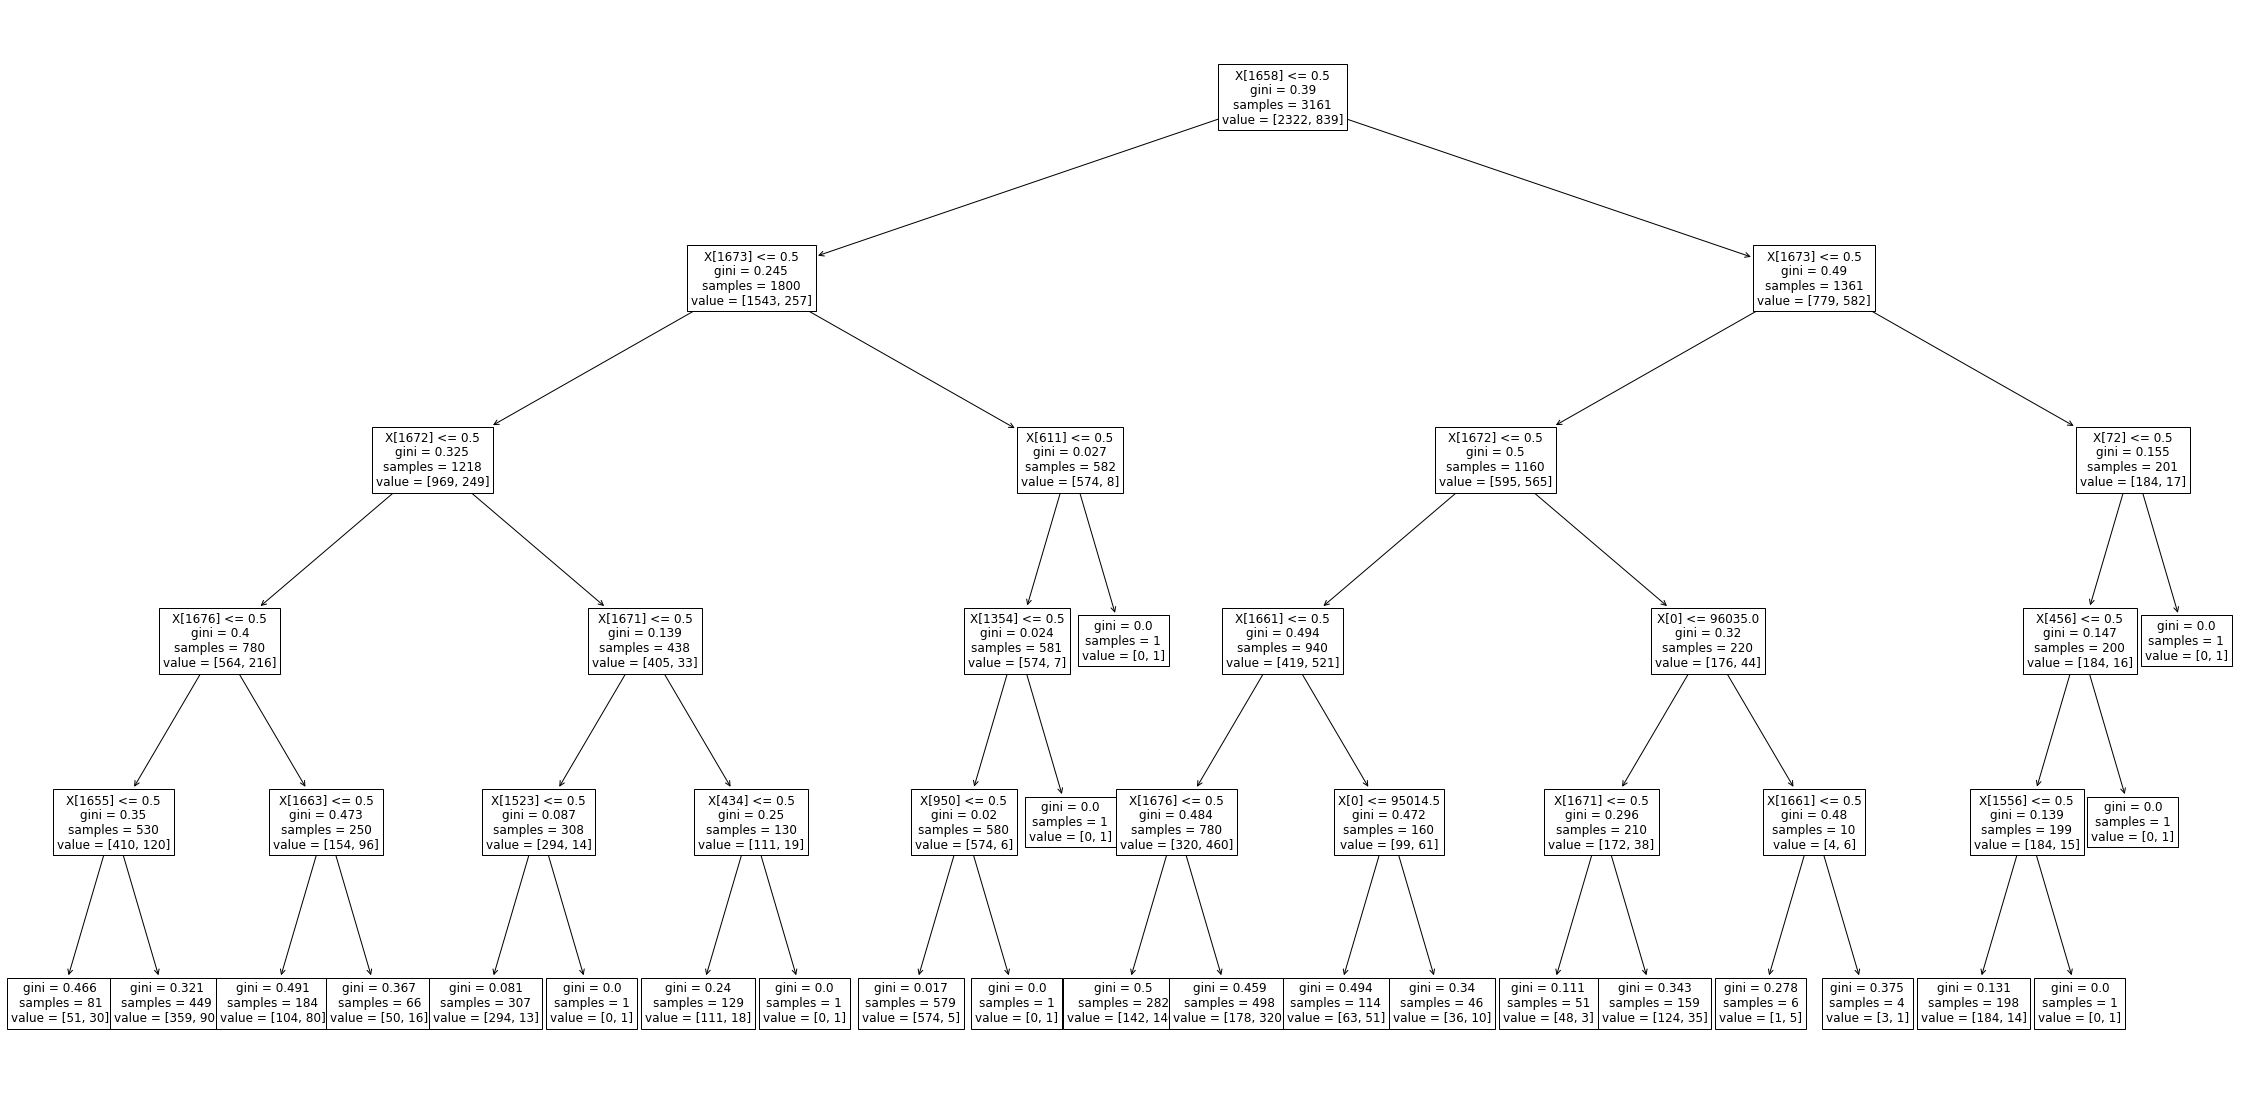

In [ ]:

tree_3 = DecisionTreeClassifier(random_state=seed, max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

tree_3.fit(X_train, y_train)

y_pred = tree_3.predict(X_val)

# Calcular e printar métricas
print("Acurácia no conjunto de treino: {:.3f}".format(tree_3.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(tree_3.score(X_val, y_val)))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("Área sob a curva ROC: {:.3f}".format(roc_auc_score(y_val, y_pred)))
plt.figure(figsize=(40,20))
plot_tree(tree_3, fontsize=12)
plt.show()

Regressão Logistica - liblinear e GridSearch CV para encontrar o melhor C

Obs: Tentei com newton-cg e o resultado foi exatamente o mesmo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


grid = {'C': np.arange(1,150,5)}

logreg_cv = GridSearchCV(LogisticRegression(solver = 'liblinear'), grid, cv = 10)
logreg_cv.fit(X_train, y_train)

print("Acurácia no conjunto de treino: {:.3f}".format(logreg_cv.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(logreg_cv.score(X_val, y_val)))
print(classification_report(y_val, logreg_cv.predict(X_val)))

Acurácia no conjunto de treino: 0.735
Acurácia no conjunto de validação: 0.735
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1144
           1       0.00      0.00      0.00       413

    accuracy                           0.73      1557
   macro avg       0.37      0.50      0.42      1557
weighted avg       0.54      0.73      0.62      1557



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST com Cross Validation

AUC média no dataset de treino: 0.845 +/- 0.006

AUC média no dataset de teste: 0.826 +/- 0.012

*Muito bom*

AUC média no dataset de treino: 0.848 +/- 0.009
AUC média no dataset de teste: 0.826 +/- 0.018


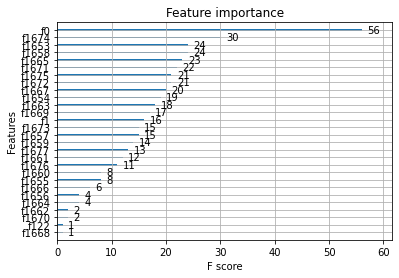

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
33,0.846385,0.009697,0.825438,0.017834
34,0.846878,0.009681,0.825784,0.018120
35,0.847077,0.009704,0.826117,0.017862
36,0.847547,0.009699,0.826220,0.018343
37,0.848411,0.009215,0.826357,0.018313


In [ ]:
import xgboost as xgb


#Criar uma DMatrix, estrutura de dados interna para o xgboost que otimiza a memória usada e velocidade de treino
data_dmatrix = xgb.DMatrix(data = X_training, label = y_training)

# Criar modelo com o XGBClassifier
xgb_model_cv = xgb.XGBClassifier(objective = 'binary:logistic', random_state = seed, eval_metric = 'auc',
                                 colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 4, alpha = 5, n_estimators = 10, use_label_encoder = False)

#Salvar parâmetros em uma variável
params = xgb_model_cv.get_xgb_params()

# Criar objeto StratifiedKFold e rodar validação cruzada
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, folds=skf, num_boost_round=5000,
                    early_stopping_rounds=10, metrics="auc", stratified=True, seed=seed)

# Ajustar o melhor número de árvores em n_estimators
xgb_model_cv.set_params(n_estimators=cv_results.shape[0])

# Treinar o modelo com os datasets de treino + validação
xgb_model_cv.fit(X_training, y_training)

# Printar a AUC média nos datasets de treino e teste
print("AUC média no dataset de treino: {:.3f} +/- {:.3f}".format(cv_results.loc[cv_results.shape[0]-1, 'train-auc-mean'],
                                                                 cv_results.loc[cv_results.shape[0]-1, 'train-auc-std']))
print("AUC média no dataset de teste: {:.3f} +/- {:.3f}".format(cv_results.loc[cv_results.shape[0]-1, 'test-auc-mean'],
                                                                cv_results.loc[cv_results.shape[0]-1, 'test-auc-std']))

# Plotar importância das variáveis
xgb.plot_importance(xgb_model_cv)
plt.show()

# Mostrar as últimas iterações da validação cruzada
cv_results.tail()

